In [51]:
# Chaitanya Mangla AI - DS B1 
# Used Bike Price Prediction 
# Use Regression to estimate the continuous sale price of a used bicycle based on its features 

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  


In [53]:
# Generate Synthetic Data
np.random.seed(42)
n_samples = 1000

brands = ['Yamaha', 'Honda', 'Suzuki', 'Bajaj', 'Royal Enfield', 'KTM']
brand = np.random.choice(brands, n_samples)

year = np.random.randint(2005, 2024, n_samples)
mileage = np.random.uniform(20, 70, n_samples)  # km/l
engine_cc = np.random.randint(100, 1000, n_samples)
power = engine_cc * np.random.uniform(0.05, 0.12, n_samples)  # rough proxy
owners = np.random.randint(1, 4, n_samples)

# price Formuala

price =(
    20000
    + (2025 - year) * -1500  # depreciation per year
    + mileage * 500
    + engine_cc * 50
    + power * 300
    - owners * 10000
    + np.random.normal(0, 20000, n_samples)  # random noise
)

df = pd.DataFrame({
    'brand': brand,
    'year': year,
    'mileage': mileage,
    'engine_cc': engine_cc,
    'power': power,
    'owners': owners,
    'price': price
})
df 
# Here the whole data is printed in tabular form

,brand,year,mileage,engine_cc,power,owners,price
0,Bajaj,2010,52.128798,598,68.642360,3,28118.321901
1,Royal Enfield,2010,57.967216,853,46.730229,1,126115.556733
2,Suzuki,2020,45.022265,564,45.191195,3,60678.958243
3,Royal Enfield,2008,47.118183,790,77.977601,1,128637.017310
4,Royal Enfield,2015,67.573928,830,68.111090,2,97272.330668
...,...,...,...,...,...,...,...
995,KTM,2010,46.122207,253,14.412969,1,34674.192182
996,Royal Enfield,2015,48.135585,538,49.616217,1,26803.021529
997,Yamaha,2007,42.061186,394,34.140903,1,34342.585182
998,Yamaha,2012,50.287765,318,21.544782,3,20452.112349


In [54]:
df = pd.get_dummies(df, columns=['brand'], drop_first=True)
df

,year,mileage,engine_cc,power,owners,price,brand_Honda,brand_KTM,brand_Royal Enfield,brand_Suzuki,brand_Yamaha
0,2010,52.128798,598,68.642360,3,28118.321901,False,False,False,False,False
1,2010,57.967216,853,46.730229,1,126115.556733,False,False,True,False,False
2,2020,45.022265,564,45.191195,3,60678.958243,False,False,False,True,False
3,2008,47.118183,790,77.977601,1,128637.017310,False,False,True,False,False
4,2015,67.573928,830,68.111090,2,97272.330668,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,2010,46.122207,253,14.412969,1,34674.192182,False,True,False,False,False
996,2015,48.135585,538,49.616217,1,26803.021529,False,False,True,False,False
997,2007,42.061186,394,34.140903,1,34342.585182,False,False,False,False,True
998,2012,50.287765,318,21.544782,3,20452.112349,False,False,False,False,True


In [55]:
# Now comes the splitting of the features 
X = df.drop(columns=['price'])
y = df['price']


In [56]:
X # Dropping the price column 

,year,mileage,engine_cc,power,owners,brand_Honda,brand_KTM,brand_Royal Enfield,brand_Suzuki,brand_Yamaha
0,2010,52.128798,598,68.642360,3,False,False,False,False,False
1,2010,57.967216,853,46.730229,1,False,False,True,False,False
2,2020,45.022265,564,45.191195,3,False,False,False,True,False
3,2008,47.118183,790,77.977601,1,False,False,True,False,False
4,2015,67.573928,830,68.111090,2,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
995,2010,46.122207,253,14.412969,1,False,True,False,False,False
996,2015,48.135585,538,49.616217,1,False,False,True,False,False
997,2007,42.061186,394,34.140903,1,False,False,False,False,True
998,2012,50.287765,318,21.544782,3,False,False,False,False,True


In [57]:
y # Only the price column is printed 

0       28118.321901
1      126115.556733
2       60678.958243
3      128637.017310
4       97272.330668
           ...      
995     34674.192182
996     26803.021529
997     34342.585182
998     20452.112349
999     78899.259450
Name: price, Length: 1000, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42) 

In [59]:
X_train

,year,mileage,engine_cc,power,owners,brand_Honda,brand_KTM,brand_Royal Enfield,brand_Suzuki,brand_Yamaha
29,2008,50.867588,112,8.623210,2,False,False,False,True,False
535,2013,29.559535,253,21.733407,2,False,False,False,True,False
695,2007,52.538427,996,57.264026,2,False,False,False,False,True
557,2009,27.047981,594,43.732432,3,True,False,False,False,False
836,2012,22.027937,175,14.187822,3,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
106,2012,38.347804,165,13.673020,1,False,False,False,True,False
270,2018,32.173898,972,49.595307,3,False,False,False,True,False
860,2005,57.049063,369,39.641625,3,False,False,False,False,False
435,2022,31.271938,540,53.107695,1,False,False,False,False,False


In [60]:
X_test

,year,mileage,engine_cc,power,owners,brand_Honda,brand_KTM,brand_Royal Enfield,brand_Suzuki,brand_Yamaha
521,2021,24.321231,795,70.890563,2,False,False,False,False,False
737,2005,63.861973,483,53.343776,1,True,False,False,False,False
740,2005,37.020292,914,96.211717,3,True,False,False,False,False
660,2019,41.005936,381,41.707078,1,False,False,False,False,False
411,2010,57.933820,223,12.096043,3,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
408,2021,61.634023,511,46.286805,2,False,True,False,False,False
332,2006,36.110775,774,61.942404,1,False,False,True,False,False
208,2016,63.805260,767,60.261912,3,False,True,False,False,False
613,2012,28.442710,503,41.546682,1,False,False,True,False,False


In [61]:
y_train

29     19494.937238
535    17297.907329
695    82410.632871
557    -9074.840872
836   -23189.502709
           ...     
106     6349.245385
270    66378.512963
860     8724.063832
435    85842.208664
102   -55925.783537
Name: price, Length: 800, dtype: float64

In [62]:
y_test 

521    80927.090040
737    68179.529770
740    45136.520361
660    45973.950880
411    44551.903457
           ...     
408    83931.506754
332    60558.376232
208    65678.246079
613    16835.530843
78     21146.849697
Name: price, Length: 200, dtype: float64

In [63]:
# importing the Linear Regression Model 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train) 

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Preprocessing: One-hot encode brand
preprocessor = ColumnTransformer([
    ('brand', OneHotEncoder(drop='first'), ['brand'])
], remainder='passthrough')

# Create pipeline
model = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([ 65793.10184085,  55147.63907451,  54140.81958895,  51909.10376437,
        11878.9763561 ,  77658.97587493,  10386.91796414,  39042.05688913,
        64941.35486362,   6525.10974518,  72668.75898588,  28027.63568722,
        94134.98660228,  69364.76508594,  76520.71237075,  16432.08634232,
        76288.0019854 ,  75581.98618215,  28460.66221598,  71767.25410941,
        43301.86374215,  14280.88651186,  84676.03738614,  21340.63144663,
        76513.5702846 ,  49079.82699152,  75547.6472628 ,  16261.10589977,
        61061.66159415,  44872.24297104,  29973.54570515,  52652.8678472 ,
        70805.82922014,  74060.36300925,  34304.70801606,  22772.66271811,
        52106.12007765,  24122.1583248 ,  48042.12159457,  26734.05865619,
        81146.46057313,  70573.90344232,  37409.9309492 ,  77422.87252694,
        31224.51287705,  17800.80845349,  14032.39566555,  46780.5806076 ,
        60724.23609104,  87968.35585888,  27048.16687561,  48609.37894485,
        56165.66411755,  

In [ ]:
# Here we evaluate the model

from sklearn.metrics import mean_absolute_error, r2_score


In [ ]:
# Mean Absolute Error 
# Average magnitude of difference between the actual and predicted values 
print("MAE:", mean_absolute_error(y_test, y_pred)) 

MAE: 14279.05939949119


In [ ]:
# R Squared Score 
print("R Square Score:", r2_score(y_test,y_pred))
# It indicates the proportion of a variance in a depndent variable in a regression model 
# Score nearer to 1 means a more accurate model 

R Square Score: 0.7021097634148759


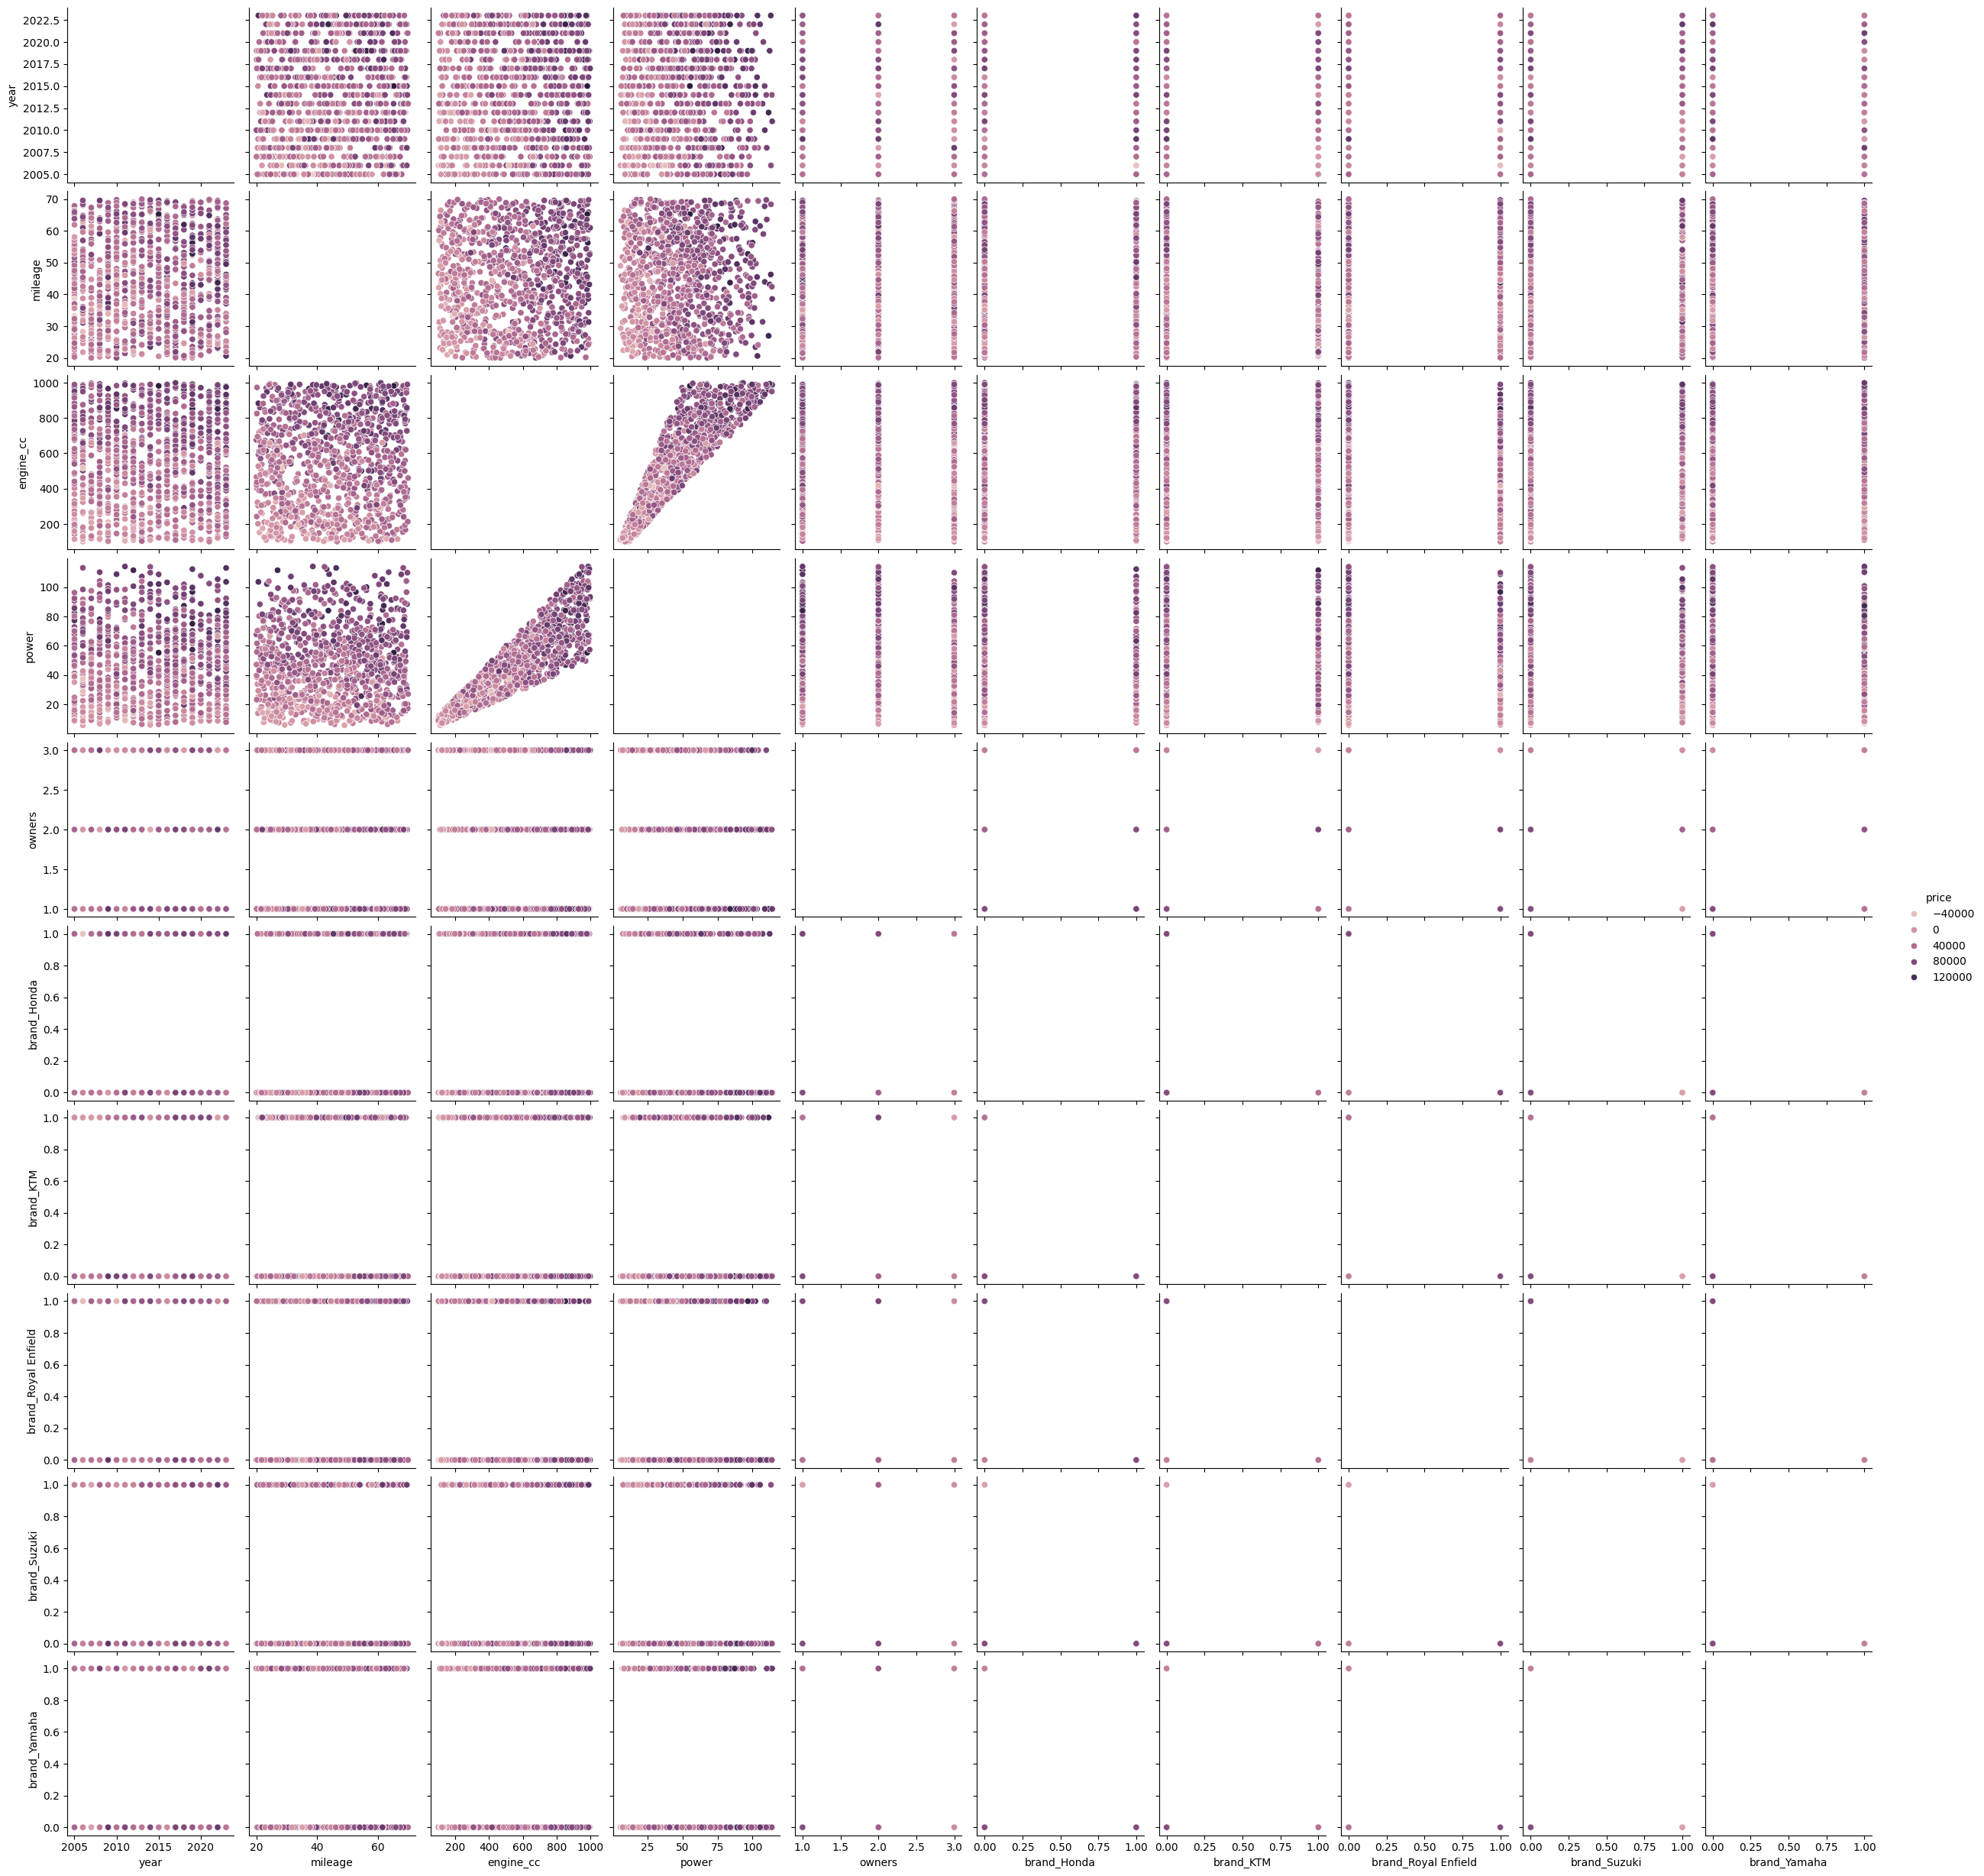

In [ ]:
sns.pairplot(df, hue= 'price')

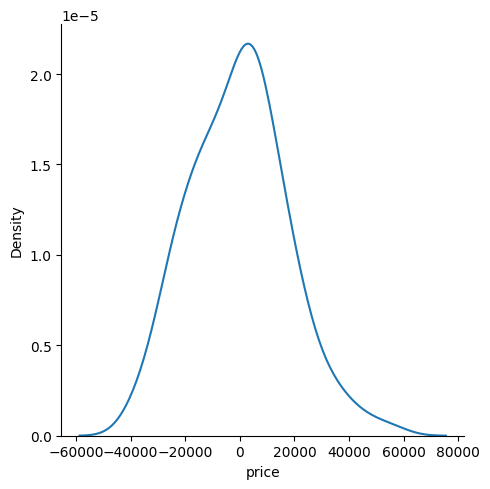

In [ ]:
sns.displot(y_test-y_pred, kind='kde')

In [ ]:


new_bike = pd.DataFrame({
    'brand': ['Yamaha'],
    'year': [2020],
    'mileage': [45],
    'engine_cc': [150],
    'power': [10],
    'owners': [1]
})

# Predict directly
price = model.predict(new_bike)

print("Predicted Price:", price[0])
